| **Inicio** | **atrás 15** | **Siguiente 17** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./15_Discretizar_Datos_Numericos.ipynb)| [⏩](./17_Analisis_de_Componentes_Principales.ipynb)|

# **16. Descubre cómo manejar Datos ó Valores Faltantes Imputando con K-Vecinos más cercanos (KNN) y Python**

## **Qué es la Imputación de valores faltantes**

**Imputación de Valores Faltantes:**

La imputación de valores faltantes es un proceso en el cual reemplazamos los valores que faltan en un conjunto de datos por valores estimados o calculados. Los valores faltantes pueden ocurrir debido a diversos motivos, como errores de medición, problemas técnicos, pérdida de datos, etc. La imputación es importante para evitar la pérdida de información y para permitir un análisis más completo y preciso de los datos.

Existen varias estrategias para imputar valores faltantes, como reemplazarlos por la media, la mediana, valores aleatorios o valores calculados a partir de modelos predictivos.

**Ejemplo de Imputación de Valores Faltantes con Gráficas:**

Supongamos que tenemos un conjunto de datos que representa la altura de un grupo de personas, pero algunos valores están faltando. Vamos a utilizar la imputación para reemplazar los valores faltantes con la media de las alturas existentes.

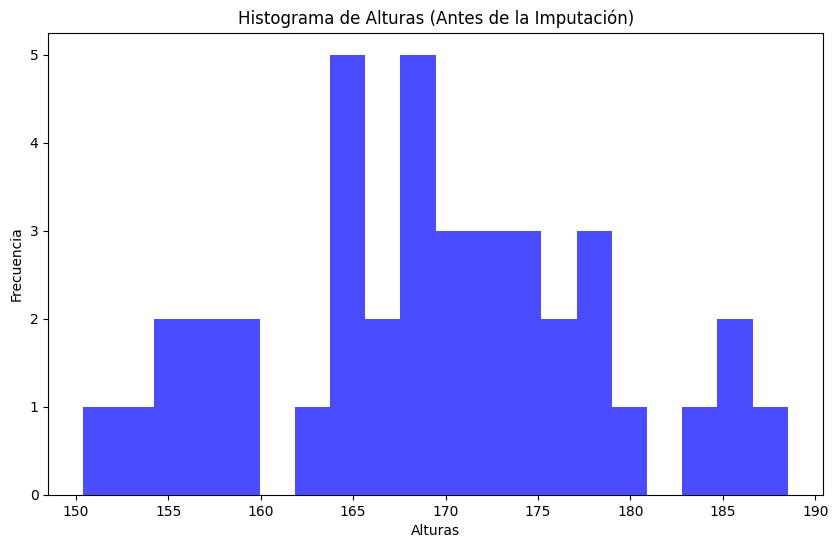

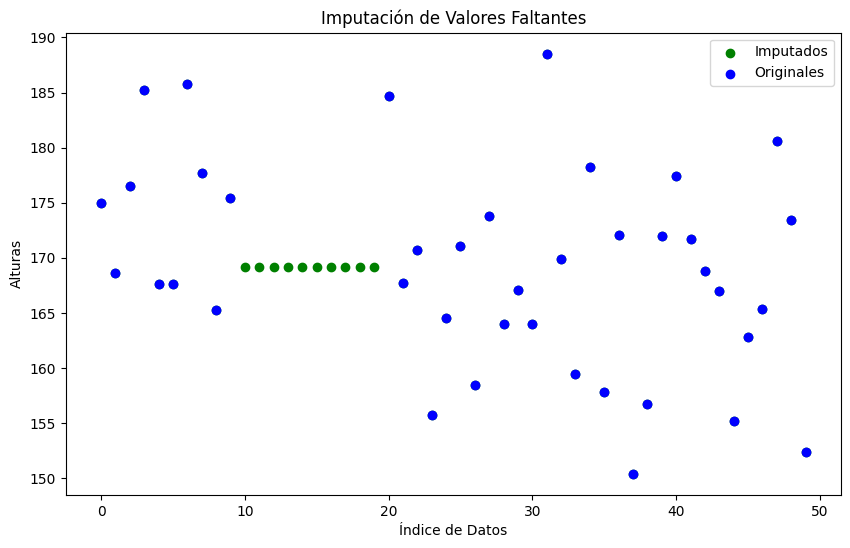

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Crear datos de ejemplo (alturas con valores faltantes)
np.random.seed(42)
alturas = np.random.normal(170, 10, size=50)
alturas[10:20] = np.nan  # Introducir valores faltantes

# Visualizar histograma de alturas antes de la imputación
plt.figure(figsize=(10, 6))
plt.hist(alturas, bins=20, color='blue', alpha=0.7)
plt.xlabel('Alturas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Alturas (Antes de la Imputación)')
plt.show()

# Reshape para que sea una matriz 2D
alturas_reshape = alturas.reshape(-1, 1)

# Imputar los valores faltantes con la media
imputador = SimpleImputer(strategy='mean')
alturas_imputadas = imputador.fit_transform(alturas_reshape)

# Visualizar los resultados de la imputación
plt.figure(figsize=(10, 6))
plt.scatter(range(len(alturas)), alturas_imputadas, color='green', label='Imputados')
plt.scatter(range(len(alturas)), alturas, color='blue', label='Originales')
plt.xlabel('Índice de Datos')
plt.ylabel('Alturas')
plt.title('Imputación de Valores Faltantes')
plt.legend()
plt.show()

**Explicación:**

1. Generamos un conjunto de datos de alturas aleatorias y visualizamos el histograma para mostrar cómo se distribuyen las alturas antes de la imputación.

2. Introducimos valores faltantes (`np.nan`) en algunos elementos del arreglo para simular datos faltantes.

3. Utilizamos `SimpleImputer` de scikit-learn para realizar la imputación. Configuramos la estrategia para imputar con la media de los valores existentes.

4. Creamos dos gráficos de dispersión: uno muestra las alturas originales (en azul) y otro muestra las alturas imputadas (en verde).

**Resultado:**

Verás dos gráficos: el primero muestra el histograma de alturas antes de la imputación, y el segundo muestra dos conjuntos de puntos en un gráfico de dispersión. Los puntos azules representan las alturas originales, mientras que los puntos verdes representan las alturas imputadas con la media. La imputación ha reemplazado los valores faltantes por la media, lo que permite mantener la estructura general de los datos y evitar la pérdida de información.

## **KNN para imputación con scikit-learn**

**KNN (k-Nearest Neighbors) para Imputación con Scikit-Learn:**

El algoritmo k-Nearest Neighbors (KNN) es una técnica de aprendizaje automático utilizada para imputar valores faltantes en un conjunto de datos. La idea básica detrás de KNN es que los valores faltantes pueden ser estimados por los valores de sus vecinos más cercanos en función de una medida de distancia.

La imputación KNN busca los k vecinos más cercanos (datos con valores conocidos) al registro con valores faltantes, y utiliza los valores de esos vecinos para estimar el valor faltante.

**Ejemplo de Imputación KNN con Gráficas:**

Vamos a utilizar un conjunto de datos que representa las edades y alturas de un grupo de personas, donde algunos valores están faltantes. Utilizaremos KNN para imputar los valores faltantes en función de los vecinos más cercanos.

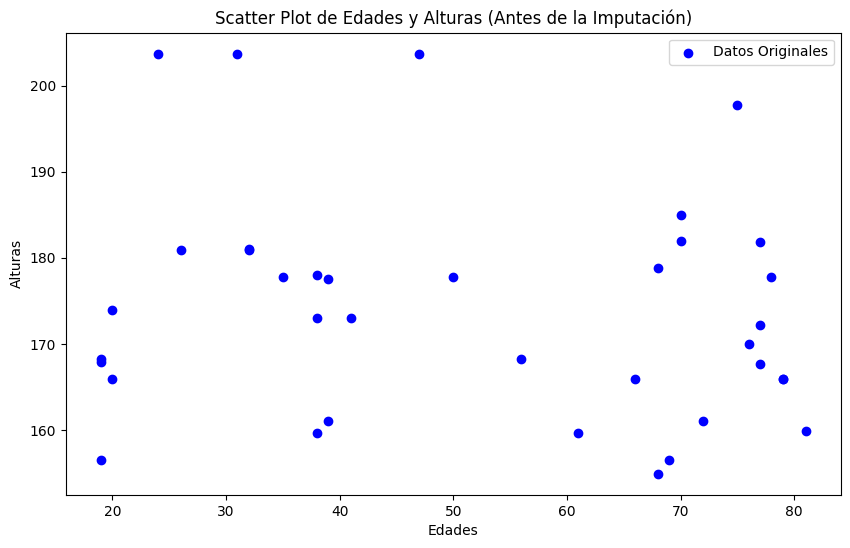

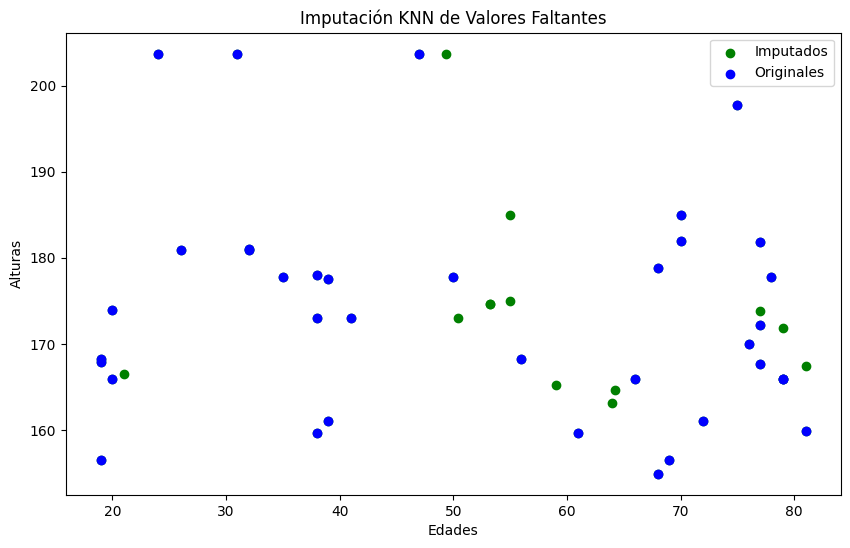

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Crear datos de ejemplo (edades y alturas con valores faltantes)
np.random.seed(42)
edades = np.random.choice(np.append(np.arange(18, 85), [np.nan]*10), size=50)
alturas = np.random.choice(np.append(np.random.normal(170, 10, size=40), [np.nan]*10), size=50)

# Visualizar scatter plot de edades y alturas antes de la imputación
plt.figure(figsize=(10, 6))
plt.scatter(edades, alturas, color='blue', label='Datos Originales')
plt.xlabel('Edades')
plt.ylabel('Alturas')
plt.title('Scatter Plot de Edades y Alturas (Antes de la Imputación)')
plt.legend()
plt.show()

# Crear una matriz con edades y alturas
datos = np.column_stack((edades, alturas))

# Imputar los valores faltantes con KNN
imputador = KNNImputer(n_neighbors=5)
datos_imputados = imputador.fit_transform(datos)

# Visualizar scatter plot de edades y alturas después de la imputación
plt.figure(figsize=(10, 6))
plt.scatter(datos_imputados[:, 0], datos_imputados[:, 1], color='green', label='Imputados')
plt.scatter(edades, alturas, color='blue', label='Originales')
plt.xlabel('Edades')
plt.ylabel('Alturas')
plt.title('Imputación KNN de Valores Faltantes')
plt.legend()
plt.show()

**Explicación:**

1. Generamos conjuntos de datos de edades y alturas aleatorias y visualizamos un gráfico de dispersión para mostrar cómo se relacionan antes de la imputación.

2. Introducimos valores faltantes (`np.nan`) en algunos elementos de los arreglos de edades y alturas para simular datos faltantes.

3. Creamos una matriz combinando las edades y alturas para que KNN pueda trabajar con ambos atributos.

4. Utilizamos `KNNImputer` de scikit-learn para realizar la imputación KNN. Configuramos `n_neighbors` para determinar cuántos vecinos se deben considerar.

5. Creamos dos gráficos de dispersión: uno muestra los datos originales (en azul) y otro muestra los datos imputados (en verde).

**Resultado:**

Verás dos gráficos de dispersión: el primero muestra cómo se relacionan las edades y alturas antes de la imputación, y el segundo muestra dos conjuntos de puntos en un gráfico de dispersión. Los puntos azules representan los datos originales, mientras que los puntos verdes representan los datos imputados utilizando el algoritmo KNN. La imputación KNN ha estimado los valores faltantes en función de los vecinos más cercanos y ha llenado los espacios en los datos.

## **Not a Number (NaN) para indicar valores faltantes**

**Not a Number (NaN) para Indicar Valores Faltantes:**

En programación y análisis de datos, "Not a Number" (NaN) es un valor especial utilizado para representar valores faltantes o no definidos en arreglos numéricos. Es una forma estándar de indicar que un valor no está presente en un conjunto de datos y es ampliamente utilizado en librerías como NumPy y pandas.

**Ejemplo de Uso de NaN con Gráficas:**

Vamos a utilizar un ejemplo simple para mostrar cómo se utiliza NaN para indicar valores faltantes en NumPy y cómo se pueden visualizar los valores faltantes en gráficos.

¿Hay valores faltantes?  [False False  True False  True False False]


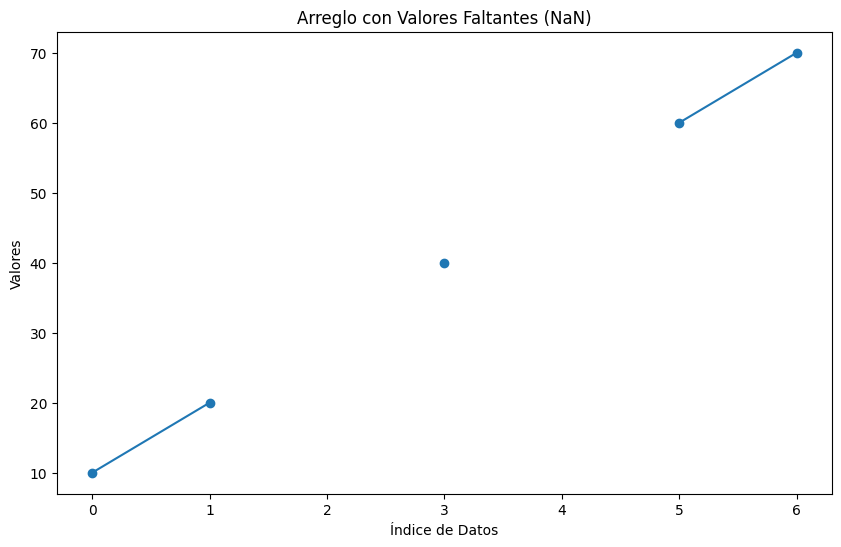

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un arreglo con algunos valores faltantes (NaN)
datos = np.array([10, 20, np.nan, 40, np.nan, 60, 70])

# Verificar si hay valores faltantes (NaN)
hay_faltantes = np.isnan(datos)
print("¿Hay valores faltantes? ", hay_faltantes)

# Visualizar el arreglo con valores faltantes
plt.figure(figsize=(10, 6))
plt.plot(datos, marker='o')
plt.xlabel('Índice de Datos')
plt.ylabel('Valores')
plt.title('Arreglo con Valores Faltantes (NaN)')
plt.show()

**Explicación:**

1. Creamos un arreglo `datos` que contiene algunos valores numéricos y algunos valores `np.nan` para indicar valores faltantes.

2. Utilizamos la función `np.isnan(datos)` para verificar si hay valores faltantes en el arreglo. Esta función devuelve un arreglo booleano donde `True` indica que hay un valor faltante en esa posición.

3. Creamos un gráfico que muestra los valores en el arreglo, utilizando puntos marcados por `o` en las posiciones correspondientes. Esto nos permite visualizar dónde se encuentran los valores faltantes en el gráfico.

**Resultado:**

El código mostrará si hay valores faltantes en el arreglo utilizando valores booleanos y, a continuación, generará un gráfico que muestra los valores en el arreglo. Los valores faltantes (NaN) se mostrarán como espacios vacíos en el gráfico, lo que permite identificar fácilmente las posiciones donde faltan valores.

## **Uso de KNN Imputer**

El uso del KNN Imputer es una técnica para imputar valores faltantes en conjuntos de datos utilizando el algoritmo k-Nearest Neighbors (KNN). El KNN Imputer reemplaza los valores faltantes por valores estimados basados en los valores de los vecinos más cercanos en función de una medida de distancia.

Aquí tienes un ejemplo detallado del uso del KNN Imputer con ejemplos y visualizaciones:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Crear datos de ejemplo (edades y alturas con valores faltantes)
np.random.seed(42)
edades = np.random.choice(np.append(np.arange(18, 85), [np.nan]*10), size=50)
alturas = np.random.choice(np.append(np.random.normal(170, 10, size=40), [np.nan]*10), size=50)

# Crear una matriz con edades y alturas
datos = np.column_stack((edades, alturas))

# Imprimir matriz original con valores faltantes
print("Matriz original con valores faltantes:\n", datos)

# Crear el KNN Imputer
imputador = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes
datos_imputados = imputador.fit_transform(datos)

# Imprimir matriz imputada
print("\nMatriz imputada:\n", datos_imputados)

Matriz original con valores faltantes:
 [[ 69.         156.53321903]
 [ 32.         180.99646976]
 [         nan          nan]
 [ 78.         177.73700417]
 [ 38.         172.96561384]
 [         nan 203.72296254]
 [         nan          nan]
 [ 41.         172.96561384]
 [ 20.         173.89348913]
 [ 39.         161.01792061]
 [ 70.         184.95434253]
 [ 19.         167.9283411 ]
 [ 47.         203.72296254]
 [ 55.                  nan]
 [ 19.         156.53321903]
 [ 81.                  nan]
 [ 77.         181.79716345]
 [ 38.         177.95595464]
 [ 50.         177.73700417]
 [         nan 172.96561384]
 [ 75.         197.78313042]
 [ 39.         177.54997797]
 [ 66.         165.89616691]
 [ 76.         169.94472138]
 [ 59.                  nan]
 [ 77.                  nan]
 [ 32.         180.91992264]
 [ 79.         165.89616691]
 [ 79.         165.89616691]
 [ 64.                  nan]
 [ 79.                  nan]
 [ 68.         178.8774846 ]
 [ 72.         161.01792061]
 [ 

**Explicación:**

1. Creamos conjuntos de datos de edades y alturas con algunos valores faltantes utilizando `np.nan`.

2. Creamos una matriz combinando los arreglos de edades y alturas para que el KNN Imputer pueda trabajar con ambos atributos.

3. Creamos una instancia de `KNNImputer` con `n_neighbors=5`, lo que significa que se considerarán los 5 vecinos más cercanos para la imputación.

4. Utilizamos el método `fit_transform()` del imputador para imputar los valores faltantes en la matriz de datos.

5. Imprimimos la matriz original con valores faltantes y la matriz imputada.

**Resultado:**

Verás las matrices originales y las matrices imputadas. Los valores faltantes en la matriz original se habrán reemplazado por valores estimados en la matriz imputada utilizando el algoritmo KNN. Esto permite tener una versión más completa del conjunto de datos sin la pérdida de información debida a los valores faltantes.

Recuerda que la imputación con KNN Imputer se basa en la similitud entre vecinos más cercanos, por lo que es importante tener en cuenta la naturaleza de los datos y la elección adecuada de los hiperparámetros, como el número de vecinos (`n_neighbors`).

## **Comparación de técnicas de imputación**

La elección de una técnica de imputación de valores faltantes depende del tipo de datos, la cantidad de valores faltantes y la naturaleza de los datos en sí. Aquí te proporcionaré una comparación de tres técnicas comunes de imputación: media, mediana y KNN (K-Nearest Neighbors).

**Técnica de Imputación: Media:**

- **Ventajas:** La imputación con la media es simple y rápida de implementar. Puede ser útil si los valores faltantes no tienen un impacto significativo en la distribución general de los datos.
- **Desventajas:** La media es sensible a valores atípicos, lo que puede afectar la imputación.

**Técnica de Imputación: Mediana:**

- **Ventajas:** Al igual que la media, la mediana es fácil de implementar y puede ser útil en conjuntos de datos con valores atípicos, ya que es resistente a ellos.
- **Desventajas:** Aunque es resistente a valores atípicos, no captura bien la forma de la distribución de los datos.

**Técnica de Imputación: KNN (K-Nearest Neighbors):**

- **Ventajas:** KNN Imputer considera la similitud entre vecinos más cercanos, lo que puede capturar mejor la estructura de los datos. Es adecuado para datos donde existe cierta relación entre las observaciones.
- **Desventajas:** Puede ser computacionalmente costoso en conjuntos de datos grandes, y el rendimiento puede depender de la elección adecuada del número de vecinos.

**Comparación y Recomendaciones:**

- Para datos numéricos con una distribución cercana a la normal y pocos valores atípicos, la imputación con la media puede ser una opción razonable y rápida.
- Si hay valores atípicos o la distribución es asimétrica, la mediana puede ser más adecuada ya que es más resistente a los valores extremos.
- Para datos donde la estructura y la relación entre observaciones son importantes, como series temporales o datos multidimensionales, el KNN Imputer podría ser la mejor opción, aunque puede requerir más tiempo de procesamiento.

En última instancia, la elección de la técnica de imputación dependerá de la naturaleza de tus datos y los objetivos del análisis. Es recomendable probar varias técnicas y evaluar su impacto en tus resultados antes de decidir cuál utilizar.

| **Inicio** | **atrás 15** | **Siguiente 17** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./15_Discretizar_Datos_Numericos.ipynb)| [⏩](./17_Analisis_de_Componentes_Principales.ipynb)|